In [13]:
"""
================================================================================
ADD THIS CELL TO YOUR PHASE 2 NOTEBOOK (01_data_collection.ipynb)
Run this BEFORE moving to Phase 3
================================================================================
"""

import pandas as pd
import yfinance as yf
from pathlib import Path
from datetime import datetime

# ============================================================================
# STEP 1: CREATE DIRECTORIES
# ============================================================================
print("="*70)
print("📁 CREATING PROJECT DIRECTORIES")
print("="*70)

# Create directory structure
directories = [
    'data/raw',
    'data/processed',
    'models',
    'visualizations',
    'notebooks'
]

for directory in directories:
    Path(directory).mkdir(parents=True, exist_ok=True)
    print(f"✓ Created: {directory}/")

print("\n✅ All directories created!")


📁 CREATING PROJECT DIRECTORIES
✓ Created: data/raw/
✓ Created: data/processed/
✓ Created: models/
✓ Created: visualizations/
✓ Created: notebooks/

✅ All directories created!


In [14]:
# ============================================================================
# STEP 2: DOWNLOAD DATA
# ============================================================================
print("\n" + "="*70)
print("📥 DOWNLOADING MARKET DATA")
print("="*70)

# Define the indices
INDICES = {
    'SP500': 'SPY',           # S&P 500 ETF (more reliable than ^GSPC)
    'Russell2000': 'IWM',     # Russell 2000 ETF (more reliable than ^RUT)
    'NASDAQ': 'QQQ'           # NASDAQ ETF (more reliable than ^IXIC)
}

# Date range: 10 years of data
end_date = datetime.now()
start_date = datetime(2015, 1, 1)

print(f"\n📅 Date Range:")
print(f"   Start: {start_date.strftime('%Y-%m-%d')}")
print(f"   End: {end_date.strftime('%Y-%m-%d')}")
print(f"   Duration: ~10 years\n")

# Download data for each index
data_dict = {}
for name, ticker in INDICES.items():
    print(f"📊 Downloading {name} ({ticker})...", end=" ")
    try:
        # Download data
        data = yf.download(ticker, start=start_date, end=end_date, progress=False)
        
        # Fix MultiIndex columns if present
        if isinstance(data.columns, pd.MultiIndex):
            data.columns = data.columns.get_level_values(0)
        
        # Store in dictionary
        data_dict[name] = data
        
        print(f"✓ {len(data):,} days")
        
    except Exception as e:
        print(f"✗ ERROR: {e}")

print(f"\n✅ Downloaded {len(data_dict)} indices successfully!")



📥 DOWNLOADING MARKET DATA

📅 Date Range:
   Start: 2015-01-01
   End: 2025-12-14
   Duration: ~10 years

📊 Downloading SP500 (SPY)... ✓ 2,754 days
📊 Downloading Russell2000 (IWM)... ✓ 2,754 days
📊 Downloading NASDAQ (QQQ)... ✓ 2,754 days

✅ Downloaded 3 indices successfully!


In [16]:
# ============================================================================
# CELL 3: TECHNICAL INDICATORS - HELPER FUNCTIONS
# ============================================================================
print("\n" + "="*70)
print("🔧 DEFINING TECHNICAL INDICATOR FUNCTIONS")
print("="*70)

def calculate_sma(data, window):
    """Simple Moving Average"""
    return data.rolling(window=window).mean()

def calculate_ema(data, span):
    """Exponential Moving Average"""
    return data.ewm(span=span, adjust=False).mean()

def calculate_rsi(data, period=14):
    """Relative Strength Index"""
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_macd(data, fast=12, slow=26, signal=9):
    """Moving Average Convergence Divergence"""
    ema_fast = calculate_ema(data, fast)
    ema_slow = calculate_ema(data, slow)
    macd = ema_fast - ema_slow
    signal_line = calculate_ema(macd, signal)
    histogram = macd - signal_line
    return macd, signal_line, histogram

def calculate_bollinger_bands(data, window=20, num_std=2):
    """Bollinger Bands"""
    sma = calculate_sma(data, window)
    std = data.rolling(window=window).std()
    upper_band = sma + (std * num_std)
    lower_band = sma - (std * num_std)
    return upper_band, sma, lower_band

def calculate_atr(high, low, close, period=14):
    """Average True Range"""
    high_low = high - low
    high_close = np.abs(high - close.shift())
    low_close = np.abs(low - close.shift())
    ranges = pd.concat([high_low, high_close, low_close], axis=1)
    true_range = ranges.max(axis=1)
    atr = true_range.rolling(window=period).mean()
    return atr

def calculate_stochastic(high, low, close, period=14):
    """Stochastic Oscillator"""
    lowest_low = low.rolling(window=period).min()
    highest_high = high.rolling(window=period).max()
    stoch = 100 * (close - lowest_low) / (highest_high - lowest_low)
    return stoch

def calculate_obv(close, volume):
    """On-Balance Volume"""
    obv = (np.sign(close.diff()) * volume).fillna(0).cumsum()
    return obv

def calculate_roc(data, period=12):
    """Rate of Change"""
    roc = ((data - data.shift(period)) / data.shift(period)) * 100
    return roc

def calculate_williams_r(high, low, close, period=14):
    """Williams %R"""
    highest_high = high.rolling(window=period).max()
    lowest_low = low.rolling(window=period).min()
    williams_r = -100 * (highest_high - close) / (highest_high - lowest_low)
    return williams_r

def calculate_cmf(high, low, close, volume, period=20):
    """Chaikin Money Flow"""
    mfm = ((close - low) - (high - close)) / (high - low)
    mfm = mfm.fillna(0)
    mf_volume = mfm * volume
    cmf = mf_volume.rolling(window=period).sum() / volume.rolling(window=period).sum()
    return cmf

print("✅ Technical indicator functions defined:")
print("   • SMA (Simple Moving Average)")
print("   • EMA (Exponential Moving Average)")
print("   • RSI (Relative Strength Index)")
print("   • MACD (Moving Average Convergence Divergence)")
print("   • Bollinger Bands")
print("   • ATR (Average True Range)")
print("   • Stochastic Oscillator")
print("   • OBV (On-Balance Volume)")
print("   • ROC (Rate of Change)")
print("   • Williams %R")
print("   • CMF (Chaikin Money Flow)")



🔧 DEFINING TECHNICAL INDICATOR FUNCTIONS
✅ Technical indicator functions defined:
   • SMA (Simple Moving Average)
   • EMA (Exponential Moving Average)
   • RSI (Relative Strength Index)
   • MACD (Moving Average Convergence Divergence)
   • Bollinger Bands
   • ATR (Average True Range)
   • Stochastic Oscillator
   • OBV (On-Balance Volume)
   • ROC (Rate of Change)
   • Williams %R
   • CMF (Chaikin Money Flow)


In [17]:
# ============================================================================
# CELL 4: CALCULATE ALL FEATURES FOR ONE INDEX
# ============================================================================
print("\n" + "="*70)
print("🎯 CALCULATING FEATURES FOR ALL INDICES")
print("="*70)

def add_technical_indicators(df):
    """
    Add all technical indicators to a dataframe
    Input: DataFrame with OHLCV columns
    Output: DataFrame with all features
    """
    result = df.copy()
    
    # Extract OHLCV
    close = result['Close']
    high = result['High']
    low = result['Low']
    open_price = result['Open']
    volume = result['Volume']
    
    print("   Calculating indicators...")
    
    # ========== TREND INDICATORS ==========
    print("      • Trend indicators (SMA, EMA, MACD)...", end="")
    result['SMA_20'] = calculate_sma(close, 20)
    result['SMA_50'] = calculate_sma(close, 50)
    result['SMA_200'] = calculate_sma(close, 200)
    result['EMA_12'] = calculate_ema(close, 12)
    result['EMA_26'] = calculate_ema(close, 26)
    result['EMA_50'] = calculate_ema(close, 50)
    
    # MACD
    macd, signal, histogram = calculate_macd(close)
    result['MACD'] = macd
    result['MACD_Signal'] = signal
    result['MACD_Histogram'] = histogram
    print(" ✓")
    
    # ========== MOMENTUM INDICATORS ==========
    print("      • Momentum indicators (RSI, Stochastic, ROC)...", end="")
    result['RSI_14'] = calculate_rsi(close, 14)
    result['Stochastic_14'] = calculate_stochastic(high, low, close, 14)
    result['ROC_12'] = calculate_roc(close, 12)
    result['Williams_R_14'] = calculate_williams_r(high, low, close, 14)
    result['Momentum_10'] = close - close.shift(10)
    print(" ✓")
    
    # ========== VOLATILITY INDICATORS ==========
    print("      • Volatility indicators (Bollinger, ATR)...", end="")
    bb_upper, bb_middle, bb_lower = calculate_bollinger_bands(close, 20, 2)
    result['BB_Upper'] = bb_upper
    result['BB_Middle'] = bb_middle
    result['BB_Lower'] = bb_lower
    result['BB_Width'] = (bb_upper - bb_lower) / bb_middle
    result['BB_Position'] = (close - bb_lower) / (bb_upper - bb_lower)
    
    result['ATR_14'] = calculate_atr(high, low, close, 14)
    result['Historical_Volatility_20'] = close.pct_change().rolling(20).std()
    print(" ✓")
    
    # ========== VOLUME INDICATORS ==========
    print("      • Volume indicators (OBV, CMF)...", end="")
    result['OBV'] = calculate_obv(close, volume)
    result['Volume_SMA_20'] = calculate_sma(volume, 20)
    result['Volume_ROC'] = calculate_roc(volume, 5)
    result['CMF_20'] = calculate_cmf(high, low, close, volume, 20)
    print(" ✓")
    
    # ========== PRICE-BASED FEATURES ==========
    print("      • Price features (returns, ranges)...", end="")
    result['Daily_Return'] = close.pct_change()
    result['Log_Return'] = np.log(close / close.shift(1))
    result['High_Low_Range'] = (high - low) / close
    result['Open_Close_Range'] = (close - open_price) / open_price
    print(" ✓")
    
    # ========== LAGGED FEATURES ==========
    print("      • Lagged features...", end="")
    for lag in [1, 5, 10]:
        result[f'Close_Lag_{lag}'] = close.shift(lag)
        result[f'Volume_Lag_{lag}'] = volume.shift(lag)
    print(" ✓")
    
    # ========== TARGET VARIABLE ==========
    print("      • Target variable (next day return)...", end="")
    result['Target_Return'] = close.shift(-1) / close - 1  # Next day return
    result['Target_Direction'] = (result['Target_Return'] > 0).astype(int)  # Binary: 1=up, 0=down
    print(" ✓")
    
    return result

# Calculate features for all indices
features_dict = {}
for name, data in data_dict.items():
    print(f"\n📊 Processing {name}...")
    features_df = add_technical_indicators(data)
    features_dict[name] = features_df
    print(f"   ✅ {name}: {len(features_df.columns)} total columns created")

print("\n✅ All features calculated successfully!")


🎯 CALCULATING FEATURES FOR ALL INDICES

📊 Processing SP500...
   Calculating indicators...
      • Trend indicators (SMA, EMA, MACD)... ✓
      • Momentum indicators (RSI, Stochastic, ROC)... ✓
      • Volatility indicators (Bollinger, ATR)... ✓
      • Volume indicators (OBV, CMF)... ✓
      • Price features (returns, ranges)... ✓
      • Lagged features... ✓
      • Target variable (next day return)... ✓
   ✅ SP500: 42 total columns created

📊 Processing Russell2000...
   Calculating indicators...
      • Trend indicators (SMA, EMA, MACD)... ✓
      • Momentum indicators (RSI, Stochastic, ROC)... ✓
      • Volatility indicators (Bollinger, ATR)... ✓
      • Volume indicators (OBV, CMF)... ✓
      • Price features (returns, ranges)... ✓
      • Lagged features... ✓
      • Target variable (next day return)... ✓
   ✅ Russell2000: 42 total columns created

📊 Processing NASDAQ...
   Calculating indicators...
      • Trend indicators (SMA, EMA, MACD)... ✓
      • Momentum indicators (RSI

In [18]:
# ============================================================================
# CELL 5: DATA QUALITY CHECK
# ============================================================================
print("\n" + "="*70)
print("🔍 DATA QUALITY ASSESSMENT")
print("="*70)

for name, df in features_dict.items():
    print(f"\n{name}:")
    print(f"   Total columns: {len(df.columns)}")
    print(f"   Total rows: {len(df)}")
    
    # Check missing values
    missing = df.isnull().sum()
    missing_cols = missing[missing > 0]
    
    if len(missing_cols) > 0:
        print(f"   Missing values in {len(missing_cols)} columns:")
        for col, count in missing_cols.items():
            pct = (count / len(df)) * 100
            print(f"      • {col}: {count} ({pct:.1f}%)")
    else:
        print("   ✓ No missing values!")
    
    # Check infinite values
    inf_count = np.isinf(df.select_dtypes(include=[np.number])).sum().sum()
    if inf_count > 0:
        print(f"   ⚠️  Warning: {inf_count} infinite values detected")
    else:
        print("   ✓ No infinite values")



🔍 DATA QUALITY ASSESSMENT

SP500:
   Total columns: 42
   Total rows: 2754
   Missing values in 27 columns:
      • SMA_20: 19 (0.7%)
      • SMA_50: 49 (1.8%)
      • SMA_200: 199 (7.2%)
      • RSI_14: 13 (0.5%)
      • Stochastic_14: 13 (0.5%)
      • ROC_12: 12 (0.4%)
      • Williams_R_14: 13 (0.5%)
      • Momentum_10: 10 (0.4%)
      • BB_Upper: 19 (0.7%)
      • BB_Middle: 19 (0.7%)
      • BB_Lower: 19 (0.7%)
      • BB_Width: 19 (0.7%)
      • BB_Position: 19 (0.7%)
      • ATR_14: 13 (0.5%)
      • Historical_Volatility_20: 20 (0.7%)
      • Volume_SMA_20: 19 (0.7%)
      • Volume_ROC: 5 (0.2%)
      • CMF_20: 19 (0.7%)
      • Daily_Return: 1 (0.0%)
      • Log_Return: 1 (0.0%)
      • Close_Lag_1: 1 (0.0%)
      • Volume_Lag_1: 1 (0.0%)
      • Close_Lag_5: 5 (0.2%)
      • Volume_Lag_5: 5 (0.2%)
      • Close_Lag_10: 10 (0.4%)
      • Volume_Lag_10: 10 (0.4%)
      • Target_Return: 1 (0.0%)
   ✓ No infinite values

Russell2000:
   Total columns: 42
   Total rows: 2754
  

In [21]:
# ============================================================================
# CELL 6: HANDLE MISSING VALUES
# ============================================================================
print("\n" + "="*70)
print("🔧 HANDLING MISSING VALUES")
print("="*70)

features_dict_clean = {}
for name, df in features_dict.items():
    print(f"\n{name}:")
    df_clean = df.copy()
    
    # Drop first 200 rows (not enough data for 200-day SMA)
    rows_before = len(df_clean)
    df_clean = df_clean.iloc[200:]
    print(f"   • Dropped first 200 rows (warmup period)")
    print(f"     Before: {rows_before} rows → After: {len(df_clean)} rows")
    
    # Forward fill remaining NaN values
    df_clean = df_clean.fillna(method='ffill')
    
    # Drop any remaining NaN rows (should be minimal)
    df_clean = df_clean.dropna()
    
    # Replace infinite values with NaN, then forward fill
    df_clean = df_clean.replace([np.inf, -np.inf], np.nan)
    df_clean = df_clean.fillna(method='ffill')
    df_clean = df_clean.dropna()
    
    features_dict_clean[name] = df_clean
    
    remaining_missing = df_clean.isnull().sum().sum()
    print(f"   ✓ Remaining missing values: {remaining_missing}")
    print(f"   ✓ Final shape: {df_clean.shape}")

print("\n✅ All data cleaned successfully!")


🔧 HANDLING MISSING VALUES

SP500:
   • Dropped first 200 rows (warmup period)
     Before: 2754 rows → After: 2554 rows
   ✓ Remaining missing values: 0
   ✓ Final shape: (2554, 42)

Russell2000:
   • Dropped first 200 rows (warmup period)
     Before: 2754 rows → After: 2554 rows
   ✓ Remaining missing values: 0
   ✓ Final shape: (2554, 42)

NASDAQ:
   • Dropped first 200 rows (warmup period)
     Before: 2754 rows → After: 2554 rows
   ✓ Remaining missing values: 0
   ✓ Final shape: (2554, 42)

✅ All data cleaned successfully!


In [22]:
# ============================================================================
# CELL 7: FEATURE STATISTICS
# ============================================================================
print("\n" + "="*70)
print("📊 FEATURE STATISTICS SUMMARY")
print("="*70)

# Display statistics for SP500 as example
sp500_features = features_dict_clean['SP500']
feature_columns = [col for col in sp500_features.columns 
                   if col not in ['Open', 'High', 'Low', 'Close', 'Volume']]

print(f"\nSP500 Feature Summary (showing first 10 features):")
print(sp500_features[feature_columns[:10]].describe())

print(f"\n📈 Feature Categories:")
print(f"   • Trend Indicators: 9 features")
print(f"   • Momentum Indicators: 5 features")
print(f"   • Volatility Indicators: 7 features")
print(f"   • Volume Indicators: 4 features")
print(f"   • Price Features: 4 features")
print(f"   • Lagged Features: 6 features")
print(f"   • Target Variables: 2 features")
print(f"   ─────────────────────────────────")
print(f"   TOTAL FEATURES: {len(feature_columns)} features")


📊 FEATURE STATISTICS SUMMARY

SP500 Feature Summary (showing first 10 features):
Price       SMA_20       SMA_50      SMA_200       EMA_12       EMA_26  \
count  2554.000000  2554.000000  2554.000000  2554.000000  2554.000000   
mean    348.420765   345.432258   331.890111   349.224305   347.829368   
std     135.582087   133.718146   125.489523   136.040215   135.123261   
min     160.139562   164.150067   170.435964   159.400698   161.831161   
25%     238.389651   237.919333   230.477088   238.740372   239.256383   
50%     319.497196   316.568882   290.180882   323.444676   320.058824   
75%     426.805960   425.281368   414.193684   427.355309   427.042845   
max     677.510498   674.412201   618.207796   682.365770   678.409856   

Price       EMA_50         MACD  MACD_Signal  MACD_Histogram       RSI_14  
count  2554.000000  2554.000000  2554.000000     2554.000000  2554.000000  
mean    345.490352     1.394938     1.390630        0.004308    57.720709  
std     133.583741     

In [23]:
# ============================================================================
# CELL 8: CORRELATION ANALYSIS
# ============================================================================
print("\n" + "="*70)
print("🔗 CORRELATION ANALYSIS")
print("="*70)

# Calculate correlation matrix for SP500
sp500_features = features_dict_clean['SP500']
feature_cols = [col for col in sp500_features.columns 
                if col not in ['Open', 'High', 'Low', 'Close', 'Volume', 
                               'Target_Return', 'Target_Direction']]

correlation_matrix = sp500_features[feature_cols].corr()

# Find highly correlated pairs (>0.9)
print("\n⚠️  Highly Correlated Feature Pairs (|r| > 0.9):")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            high_corr_pairs.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if high_corr_pairs:
    for pair in high_corr_pairs[:10]:  # Show first 10
        print(f"   • {pair['Feature 1']:20s} ↔ {pair['Feature 2']:20s}: {pair['Correlation']:+.3f}")
    print(f"\n   Total highly correlated pairs: {len(high_corr_pairs)}")
else:
    print("   ✓ No feature pairs with correlation > 0.9")

# Correlation with target
print("\n📊 Top 10 Features Correlated with Target Return:")
target_corr = sp500_features[feature_cols].corrwith(sp500_features['Target_Return'])
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

for feature in target_corr_sorted.head(10).index:
    corr_value = target_corr[feature]
    print(f"   {feature:30s}: {corr_value:+.4f}")



🔗 CORRELATION ANALYSIS

⚠️  Highly Correlated Feature Pairs (|r| > 0.9):
   • SMA_20               ↔ SMA_50              : +0.998
   • SMA_20               ↔ SMA_200             : +0.988
   • SMA_20               ↔ EMA_12              : +1.000
   • SMA_20               ↔ EMA_26              : +1.000
   • SMA_20               ↔ EMA_50              : +0.999
   • SMA_20               ↔ BB_Upper            : +0.999
   • SMA_20               ↔ BB_Middle           : +1.000
   • SMA_20               ↔ BB_Lower            : +0.999
   • SMA_20               ↔ Close_Lag_1         : +0.998
   • SMA_20               ↔ Close_Lag_5         : +0.999

   Total highly correlated pairs: 71

📊 Top 10 Features Correlated with Target Return:
   Daily_Return                  : -0.1340
   Log_Return                    : -0.1338
   Open_Close_Range              : -0.1164
   CMF_20                        : -0.0446
   MACD                          : -0.0370
   Momentum_10                   : -0.0362
   Volume_


📊 GENERATING VISUALIZATIONS
✓ Saved: visualizations/technical_indicators.png


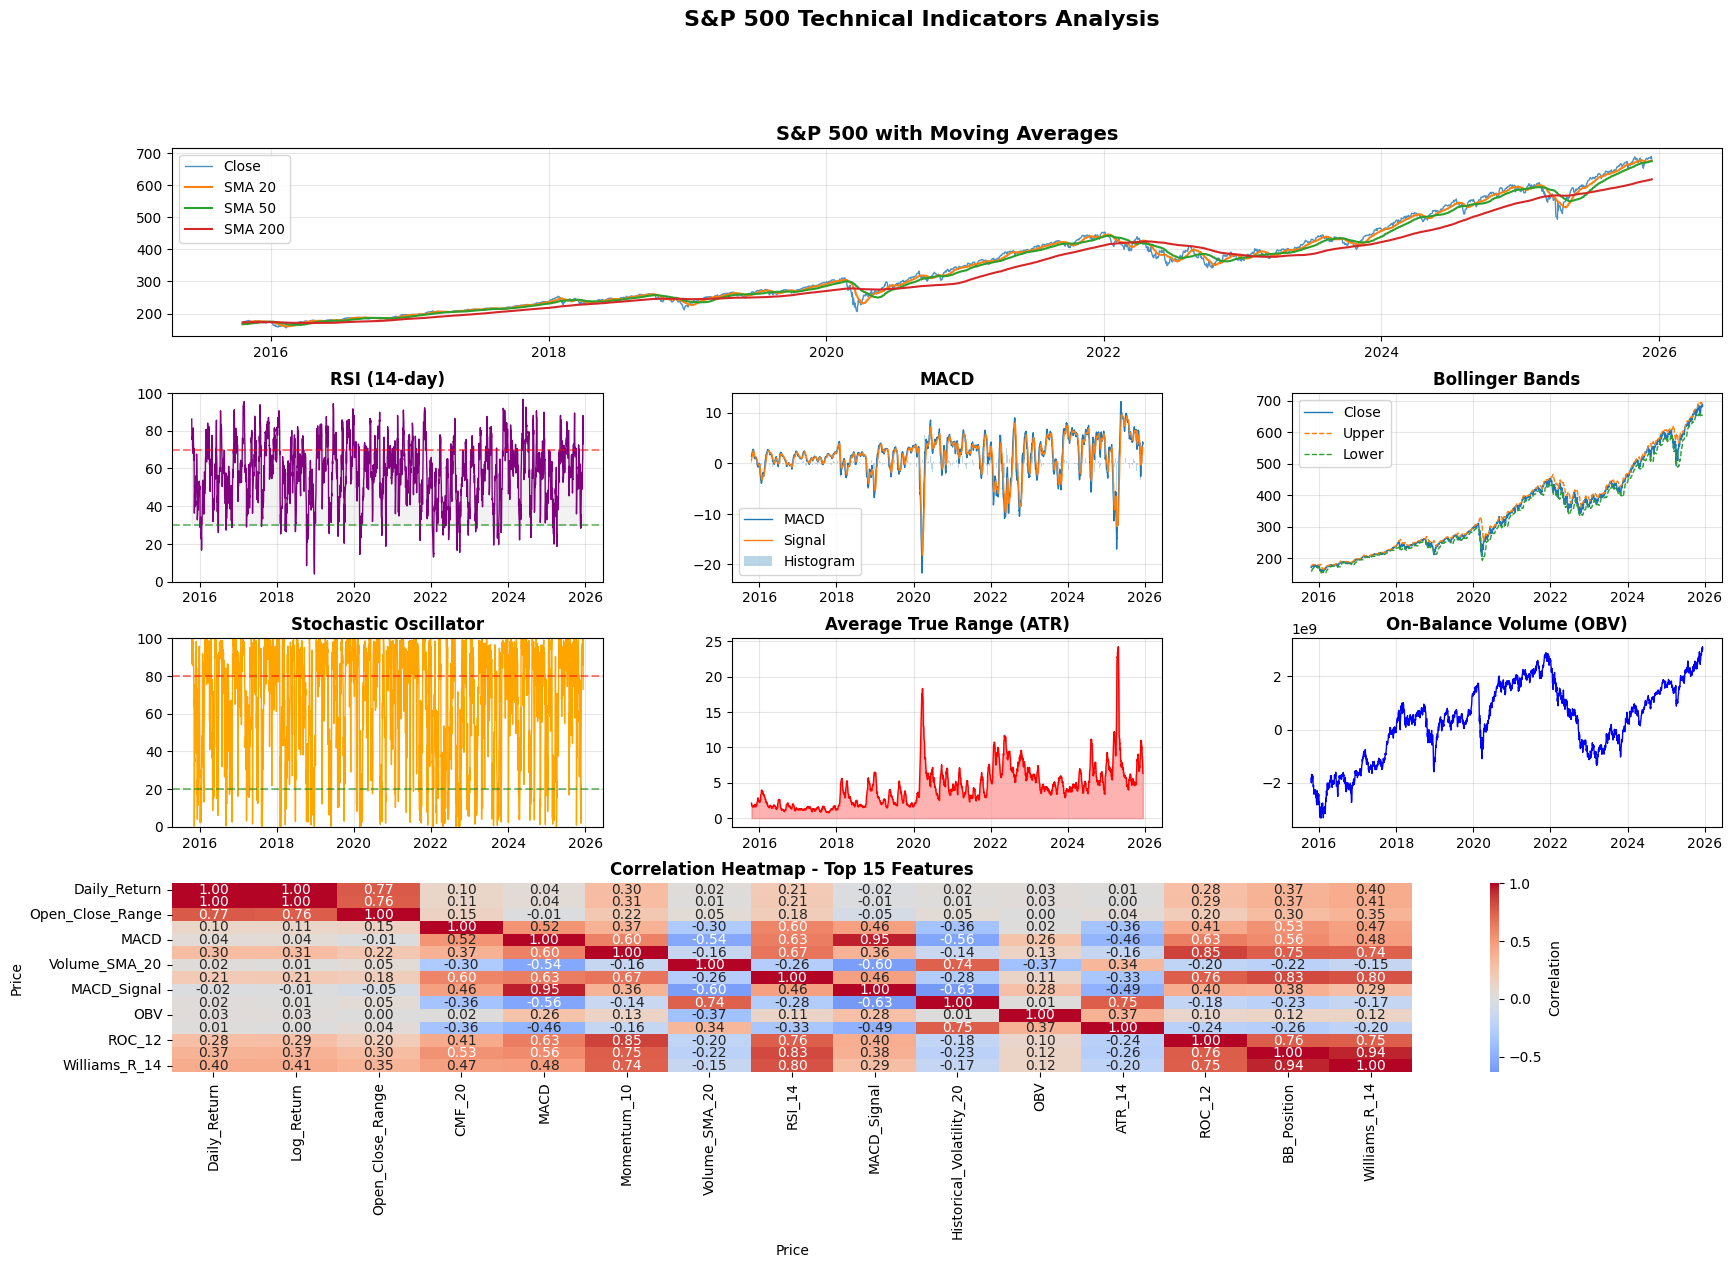

In [27]:
# ============================================================================
# CELL 9: VISUALIZATIONS
# ============================================================================
print("\n" + "="*70)
print("📊 GENERATING VISUALIZATIONS")
print("="*70)

sp500_data = features_dict_clean['SP500']

# Create comprehensive visualization
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(4, 3, hspace=0.3, wspace=0.3)

# 1. Price with Moving Averages
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(sp500_data.index, sp500_data['Close'], label='Close', linewidth=1, alpha=0.8)
ax1.plot(sp500_data.index, sp500_data['SMA_20'], label='SMA 20', linewidth=1.5)
ax1.plot(sp500_data.index, sp500_data['SMA_50'], label='SMA 50', linewidth=1.5)
ax1.plot(sp500_data.index, sp500_data['SMA_200'], label='SMA 200', linewidth=1.5)
ax1.set_title('S&P 500 with Moving Averages', fontsize=14, fontweight='bold')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

# 2. RSI
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(sp500_data.index, sp500_data['RSI_14'], color='purple', linewidth=1)
ax2.axhline(y=70, color='r', linestyle='--', alpha=0.5)
ax2.axhline(y=30, color='g', linestyle='--', alpha=0.5)
ax2.fill_between(sp500_data.index, 30, 70, alpha=0.1, color='gray')
ax2.set_title('RSI (14-day)', fontweight='bold')
ax2.set_ylim(0, 100)
ax2.grid(True, alpha=0.3)

# 3. MACD
ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(sp500_data.index, sp500_data['MACD'], label='MACD', linewidth=1)
ax3.plot(sp500_data.index, sp500_data['MACD_Signal'], label='Signal', linewidth=1)
ax3.bar(sp500_data.index, sp500_data['MACD_Histogram'], label='Histogram', alpha=0.3)
ax3.set_title('MACD', fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Bollinger Bands
ax4 = fig.add_subplot(gs[1, 2])
ax4.plot(sp500_data.index, sp500_data['Close'], label='Close', linewidth=1)
ax4.plot(sp500_data.index, sp500_data['BB_Upper'], label='Upper', linewidth=1, linestyle='--')
ax4.plot(sp500_data.index, sp500_data['BB_Lower'], label='Lower', linewidth=1, linestyle='--')
ax4.fill_between(sp500_data.index, sp500_data['BB_Lower'], sp500_data['BB_Upper'], alpha=0.1)
ax4.set_title('Bollinger Bands', fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. Stochastic Oscillator
ax5 = fig.add_subplot(gs[2, 0])
ax5.plot(sp500_data.index, sp500_data['Stochastic_14'], color='orange', linewidth=1)
ax5.axhline(y=80, color='r', linestyle='--', alpha=0.5)
ax5.axhline(y=20, color='g', linestyle='--', alpha=0.5)
ax5.set_title('Stochastic Oscillator', fontweight='bold')
ax5.set_ylim(0, 100)
ax5.grid(True, alpha=0.3)

# 6. ATR
ax6 = fig.add_subplot(gs[2, 1])
ax6.plot(sp500_data.index, sp500_data['ATR_14'], color='red', linewidth=1)
ax6.fill_between(sp500_data.index, sp500_data['ATR_14'], alpha=0.3, color='red')
ax6.set_title('Average True Range (ATR)', fontweight='bold')
ax6.grid(True, alpha=0.3)

# 7. OBV
ax7 = fig.add_subplot(gs[2, 2])
ax7.plot(sp500_data.index, sp500_data['OBV'], color='blue', linewidth=1)
ax7.set_title('On-Balance Volume (OBV)', fontweight='bold')
ax7.grid(True, alpha=0.3)

# 8. Correlation Heatmap (top features)
ax8 = fig.add_subplot(gs[3, :])
top_features = target_corr_sorted.head(15).index
corr_subset = sp500_data[top_features].corr()
sns.heatmap(corr_subset, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            ax=ax8, cbar_kws={'label': 'Correlation'})
ax8.set_title('Correlation Heatmap - Top 15 Features', fontweight='bold')

plt.suptitle('S&P 500 Technical Indicators Analysis', fontsize=16, fontweight='bold', y=0.995)
plt.savefig('visualizations/technical_indicators.png', dpi=300, bbox_inches='tight')
print("✓ Saved: visualizations/technical_indicators.png")
plt.show()


In [26]:
# ============================================================================
# CELL 10: SAVE PROCESSED DATA
# ============================================================================
print("\n" + "="*70)
print("💾 SAVING PROCESSED DATA")
print("="*70)

for name, df in features_dict_clean.items():
    filepath = f"data/processed/{name}_features.csv"
    df.to_csv(filepath)
    print(f"✓ Saved: {filepath}")
    print(f"   Shape: {df.shape}")
    print(f"   Features: {len(df.columns)} columns")

print("\n✅ All processed data saved!")


💾 SAVING PROCESSED DATA
✓ Saved: data/processed/SP500_features.csv
   Shape: (2554, 42)
   Features: 42 columns
✓ Saved: data/processed/Russell2000_features.csv
   Shape: (2554, 42)
   Features: 42 columns
✓ Saved: data/processed/NASDAQ_features.csv
   Shape: (2554, 42)
   Features: 42 columns

✅ All processed data saved!
